In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from os import getenv

In [14]:
data = pd.read_csv('../consolidated_dataset/consolidated.csv')

In [15]:
target = getenv('TARGET')
random_state = int(getenv('RANDOM_STATE'))

train = data.sample(frac=0.8, random_state=random_state)
test = data.drop(train.index).sample(frac=1.0, random_state=random_state)

y_train = train[target]
x_train = train.drop(columns=target)

y_test = test[target]
x_test = test.drop(columns=target)

In [16]:
from sklearn import naive_bayes

modelo = naive_bayes.BernoulliNB()
modelo.fit(x_train, y_train)

BernoulliNB()

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo.predict(x_test)

print("Accuracy: {:.4f}".format(accuracy_score(y_pred=y_pred, y_true=y_test)))
print("Precision: {:.4f}".format(precision_score(y_pred=y_pred, y_true=y_test)))
print("Recall: {:.4f}".format(recall_score(y_pred=y_pred, y_true=y_test)))
print("F1 Score: {:.4f}".format(f1_score(y_pred=y_pred, y_true=y_test)))

Accuracy: 0.5250
Precision: 0.5000
Recall: 0.5789
F1 Score: 0.5366


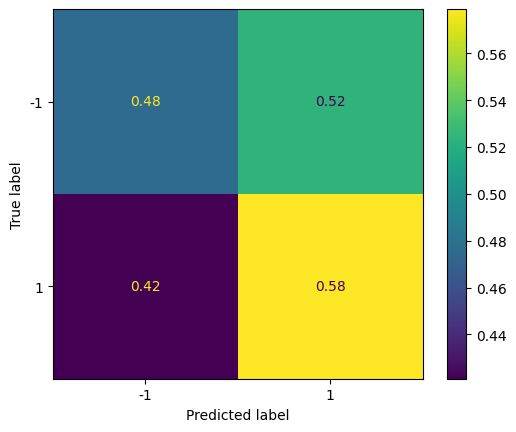

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')